In [1]:
import pandas as pd
import numpy as np
import re
%matplotlib inline 
import nltk
nltk.download('punkt')
import nltk  
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.metrics.distance  import edit_distance
nltk.download('words')
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('D:/Desktop 10/A1_dataset.csv')
df

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...
...,...,...,...
4282,1,Sat Jun 06 22:45:26 2009,@QandQ My performances on my CLEP tests. #qshock
4283,0,Tue Jun 16 10:17:07 2009,"ugh no, rcn had all the true blood episodes on..."
4284,1,Fri May 01 22:00:42 2009,Just returned from the forest! Sarah (my merch...
4285,1,Sun Jun 07 02:09:46 2009,is proud of her dad and his piece of work. ( h...


In [3]:
df_negative = df[df['LABEL'] == 0]
df_positive = df[df['LABEL'] == 1]

In [4]:
df_negative

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared
9,0,Wed Jun 17 09:18:19 2009,Needs to shake this gloomy feeling!! Maybe ...
10,0,Mon Jun 22 13:51:56 2009,Minecart ride now. Sarah's still too afraid to...
12,0,Fri May 22 00:37:02 2009,@sokendrakouture yea alone
18,0,Thu May 21 23:50:48 2009,@flyingbolt Not as good without you!
...,...,...,...
4277,0,Thu Jun 04 08:49:03 2009,Bill Killed. http://tr.im/nqmj I'm sure I'm ...
4278,0,Sun May 17 04:54:28 2009,", I wanted her to get with Nick he was so sweet"
4279,0,Mon Jun 15 13:14:51 2009,I guess we're sitting in a tornado and severe ...
4283,0,Tue Jun 16 10:17:07 2009,"ugh no, rcn had all the true blood episodes on..."


In [5]:
df_positive

,LABEL,DATE_TIME,TEXT
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...
5,1,Sun May 17 03:26:30 2009,@mrstessyman What ever you do have a good day....
...,...,...,...
4280,1,Fri May 29 22:38:19 2009,Good night! Excited about a day of fishing tom...
4281,1,Fri Jun 05 23:34:44 2009,with my love.
4282,1,Sat Jun 06 22:45:26 2009,@QandQ My performances on my CLEP tests. #qshock
4284,1,Fri May 01 22:00:42 2009,Just returned from the forest! Sarah (my merch...


In [6]:
df['TEXT']

0                       About to get threaded and scared 
1       @awaisnaseer I like Shezan Mangooo too!!! I ha...
2       worked on my car after work. showering then go...
3       @Marama Actually we start this afternoon!  I w...
4       @gfalcone601 Aww Gi.don't worry.we'll vote for...
                              ...                        
4282    @QandQ My performances on my CLEP tests.  #qshock
4283    ugh no, rcn had all the true blood episodes on...
4284    Just returned from the forest! Sarah (my merch...
4285    is proud of her dad and his piece of work. ( h...
4286    Just woke up, gonna eat pizza for breakfast. A...
Name: TEXT, Length: 4287, dtype: object

## Q1

### A
### a. average number of sentences and tokens.

In [7]:
positive_reactions = df_positive['TEXT'].to_list()
positive_sentences = []

for reaction in positive_reactions:
    x = re.split(r'[.!?]+', reaction)
    positive_sentences.append(len(x))
    
print("Average number of sentences in positive class = {}".format(sum(positive_sentences)/len(positive_sentences)))

Average number of sentences in positive class = 2.3935286401399214


In [8]:
negative_reactions = df_negative['TEXT'].to_list()
negative_sentences = []

for reaction in negative_reactions:
    x = re.split(r'[.!?]+', reaction)
    negative_sentences.append(len(x))
    
print("Average number of sentences in negative class = {}".format(sum(negative_sentences)/len(negative_sentences)))

Average number of sentences in negative class = 2.2405


In [9]:
positive_reactions = df_positive['TEXT'].to_list()
positive_tokens = []

for reaction in positive_reactions:
    x = re.findall(r'\w+', reaction)
    positive_tokens.append(len(x))
    
print("Average number of tokens in positive class = {}".format(sum(positive_tokens)/len(positive_tokens)))

Average number of tokens in positive class = 13.389156099693922


In [10]:
negative_reactions = df_negative['TEXT'].to_list()
negative_tokens = []

for reaction in negative_reactions:
    x = re.findall(r'\w+', reaction)
    negative_tokens.append(len(x))
    
print("Average number of tokens in negative class = {}".format(sum(negative_tokens)/len(negative_tokens)))

Average number of tokens in negative class = 14.147


### b total number of words starting with consonants and vowels.

In [11]:
positive_tokens = []
negative_tokens = []

for reaction in positive_reactions:
    x = re.findall(r'\w+', reaction)
    positive_tokens.extend(x)
    
for reaction in negative_reactions:
    x = re.findall(r'\w+', reaction)
    negative_tokens.extend(x)

In [12]:
re_exp = '^[AEIOUaeiou][A-Za-z0-9_]*'
re_exp1 = '[^AEIOUaeiou][a-zA-Z]*[AEIOUaeiou]'
pos_vowel_count = 0
neg_vowel_count = 0
pos_const_count = 0
neg_const_count = 0

for token in positive_tokens:
    if re.search(re_exp, token):
        pos_vowel_count = pos_vowel_count + 1
    if re.search(re_exp1, token):
        pos_const_count = pos_const_count + 1
        
for token in negative_tokens:
    if re.search(re_exp, token):
        neg_vowel_count = neg_vowel_count + 1
    if re.search(re_exp1, token):
        neg_const_count = neg_const_count + 1
        
print("Words starting with vowel in positive class: {}".format(pos_vowel_count))
print("Words starting with vowel in negative class: {}".format(neg_vowel_count))
print("Words starting with consonant in positive class: {}".format(pos_const_count))
print("Words starting with consonant in negative class: {}".format(neg_const_count))

Words starting with vowel in positive class: 7189
Words starting with vowel in negative class: 6990
Words starting with consonant in positive class: 22922
Words starting with consonant in negative class: 20728


### c. lowercase the text and report the number of unique tokens present before and after lower casing.

In [13]:
positive_lowercase = list(map(lambda x: x.lower(), positive_tokens))
negative_lowercase = list(map(lambda x: x.lower(), negative_tokens))

print("Unique tokens present in positive class before lowercasing : {}".format(len(set(positive_tokens))))
print("Unique tokens present in negative class before lowercasing : {}".format(len(set(negative_tokens))))
print("Unique tokens present in positive class after lowercasing : {}".format(len(set(positive_lowercase))))
print("Unique tokens present in negative class after lowercasing : {}".format(len(set(negative_lowercase))))

Unique tokens present in positive class before lowercasing : 7852
Unique tokens present in negative class before lowercasing : 6417
Unique tokens present in positive class after lowercasing : 6819
Unique tokens present in negative class after lowercasing : 5620


In [14]:
# extra = []
# for reaction in negative_reactions:
#     x = re.split(r'[.!?]+', reaction)
#     print(x)

### d. count and list all the usernames.

In [15]:
usernames_positive = []

for reaction in positive_reactions:
    u = re.findall('@\w+', reaction)
    if len(u) != 0:
        usernames_positive.extend(u)
        
print("Count of usernames in positive label: {}".format(len(usernames_positive)))
print(usernames_positive)

usernames_negative = []

for reaction in negative_reactions:
    u = re.findall('@\w+', reaction)
    if len(u) != 0:
        usernames_negative.extend(u)
        
print("Count of usernames in negative label: {}".format(len(usernames_negative)))
print(usernames_negative)

Count of usernames in positive label: 1305
['@awaisnaseer', '@Marama', '@gfalcone601', '@mrstessyman', '@GetMeVideo', '@tb78', '@RealDeal32', '@yoginifoodie', '@mileycyrus', '@SCTunstall', '@IHauntWizards', '@soycamo', '@Liverpool_TX', '@domkoenig', '@Cyberela', '@spencerpratt', '@Bossmobb', '@cmrush', '@nachojohnny', '@teambudd1', '@mrskutcher', '@EastCoastGamblr', '@mitchelmusso', '@nessie_111', '@nakulshenoy', '@jeddimkins', '@DannyMcEvoy', '@Courtney_182', '@DavidArchie', '@Smithycurt', '@chuckiem', '@MicheleKnight', '@jacdo', '@Dj_SportsChick', '@HisFitness', '@AmazingPhil', '@Wendym00n', '@nathalichristy', '@MATTHARDYBRAND', '@MaryJoRs', '@bedoggtde', '@mommo9000', '@SupaSash11', '@MAYAHZONFIYA', '@egoodlett', '@angelajames', '@rafaelvandyke', '@rainbowsleeve', '@shaundiviney', '@stephenfry', '@zate', '@edlee', '@DonnieWahlberg', '@softandpoofyone', '@twishmay', '@TheRoundDiet', '@romaineami', '@Joenid', '@mahika', '@calvinharris', '@jazzyfizza', '@DsBabyGirl', '@LamarLee', '@tra

### e. count and list all the urls.

In [16]:
urls_positive = []

for reaction in positive_reactions:
    #u = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', reaction)
    u = re.findall(r'https?://\S+|www\.\S+', reaction)
    
    if len(u) != 0:
        urls_positive.extend(u)
        
print("Count of usernames in positive label: {}".format(len(urls_positive)))
print(urls_positive)

urls_negative = []

for reaction in negative_reactions:
    u = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', reaction)
    if len(u) != 0:
        urls_negative.extend(u)
        
print("Count of usernames in negative label: {}".format(len(urls_negative)))
print(urls_negative)

Count of usernames in positive label: 136
['http://blip.fm/~4lfcc', 'http://bit.ly/rwoHR', 'http://su.pr/1rXuPY', 'http://twitpic.com/6b03x', 'http://tinyurl.com/dk5p94)', 'http://leo.lobato.org/Blipster/', 'http://bit.ly/nZZQV', 'http://bit.ly/etD3a', 'http://dontkillspike.proboards.com/', 'http://fuzz-ball.com/twitter', 'http://twendz.com', 'http://twitpic.com/66zex', 'http://twitpic.com/6fs89', 'http://www.myspace.com/xautomaticgirlx', 'www.musiqtone.com', 'http://plurk.com/p/z0xer', 'http://blip.fm/~4kokb', 'http://tinyurl.com/pboph6', 'http://is.gd/QAaz', 'www.paramore.net/shows', 'http://twitpic.com/680rp', 'http://tinyurl.com/mtq5u2', 'http://twitpic.com/6ddox', 'www.m2e.asia', 'http://ustre.am/2txz)', 'http://bit.ly/H6RNb', 'http://yfrog.com/0fvoqj', 'http://plurk.com/p/xfn8o', 'http://bnup2.com/p/569236', 'http://myloc.me/21Sd', 'http://twitpic.com/6dty8', 'http://bit.ly/Jsxm', 'http://tr.im/n0Cy', 'http://tweet.sg', 'http://plurk.com/p/xt8cm', 'http://bit.ly/2mFB2', 'http://m

### f. count the number of tweets for each day of the week. Eg Mon: 58, Tues: 20,Wed...

In [569]:
date_positive = df_positive['DATE_TIME'].to_list()
counts_positive = {'Mon': 0, 'Tue': 0, 'Wed' : 0, 'Thu': 0, 'Fri': 0, 'Sat': 0, 'Sun': 0}

for date in date_positive:
    for key in counts_positive.keys():
        if re.search(key, date):
            counts_positive[key] = counts_positive[key] + 1
            
print(counts_positive)

{'Mon': 481, 'Tue': 132, 'Wed': 172, 'Thu': 50, 'Fri': 391, 'Sat': 298, 'Sun': 763}


In [570]:
date_negative = df_negative['DATE_TIME'].to_list()
counts_negative = {'Mon': 0, 'Tue': 0, 'Wed' : 0, 'Thu': 0, 'Fri': 0, 'Sat': 0, 'Sun': 0}

for date in date_negative:
    for key in counts_negative.keys():
        if re.search(key, date):
            counts_negative[key] = counts_negative[key] + 1
            
print(counts_negative)

{'Mon': 391, 'Tue': 154, 'Wed': 127, 'Thu': 171, 'Fri': 473, 'Sat': 119, 'Sun': 565}


### B. You will be given a word x and a class label during the demonstration, and your programme must be able to output the following.
a. total number of occurrences of the given word and sentences containing that word.<br>
b. number of sentences starting with the given word.<br>
c. number of sentences ending with the given word.<br>

In [571]:
def printOut(class_label, word):
    total_occurrences = 0
    start_occurrences = 0
    end_occurrences = 0
    if class_label == 0:
        reactions = negative_reactions
    else:
        reactions = positive_reactions
        # Negative class
    for reaction in reactions:
        sentences = re.split(r'[.!?]+', reaction)
        for sentence in sentences:
            occur = re.findall('\w*{}\w*'.format(word), sentence)
            if len(occur) != 0:
                print(sentence)
                total_occurrences = total_occurrences + len(occur)
            start_occur = re.search('^{}'.format(word), sentence)
            if start_occur is not None:
                start_occurrences = start_occurrences + 1
            end_occur = re.search('{}$'.format(word), sentence)
            if end_occur is not None:
                end_occurrences = end_occurrences + 1
    print("Total Occurrences = {}, Starting Occurrences = {}, Ending Occurrences = {}".format(total_occurrences, start_occurrences, end_occurrences))
    
printOut(0, 'this')

Needs to shake this gloomy feeling
Cat has an appt this afternoon at 3:45
 She ate a little this morning
 I must remedy this at once
@markvanbaale No, I didn't see anything -- watched for awhile earlier this evening but then had to get back to deadlines
and my poor daughter (Vero, 16) is on a Rock festival for this weekend
 Now I know I'm never gonna receive a Twitter reply or get to meet u during my Vegas trip this year
 what is this country coming 2
Bah this hotel only has wireless-G  want-N
i need to go out soon   i dont wanna but this weight aint gonna shift its self is it lol x
 Its been years since I slept that late, dogs where strangely quiet this morning
 Was hoping to unlock and use Cdn phone to tweet from a charity bike ride in the US this weekend
 I can script in 4 different programming languages, yet this stuff is scrambling my brain 
god i hate waking up this early 
- gonna make whatever I pull together this a
Parsley stalks don't have a lot of strength and integrity, i fo

# Q2

## Text Pre-Processing

### Steps followed for the pre-processing are as follows:


#### 
1. Lower_case
2. Removal of HTML_tags
3. Removal of URL's
4. Removal of punctuations
5. Removal of whitespaces
6. Removal of stopwords
7. Spelling Correction
8. Tokenization
9. Lemmatization

In [590]:
# Loading the data
#from google.colab import drive 
#drive.mount('/content/drive')

In [666]:
data = pd.read_csv("D:/Desktop 10/A1_dataset.csv")
data

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...
...,...,...,...
4282,1,Sat Jun 06 22:45:26 2009,@QandQ My performances on my CLEP tests. #qshock
4283,0,Tue Jun 16 10:17:07 2009,"ugh no, rcn had all the true blood episodes on..."
4284,1,Fri May 01 22:00:42 2009,Just returned from the forest! Sarah (my merch...
4285,1,Sun Jun 07 02:09:46 2009,is proud of her dad and his piece of work. ( h...


#### Lower Casing

In [667]:
data['msg_lower']= data['TEXT'].apply(lambda x: x.lower())

In [668]:
#print(data.loc[data['LABEL'] == 0]["TEXT"])
#print(data.loc[data['LABEL'] == 0]["msg_lower"])
#print(data.loc[data['LABEL'] == 1]["TEXT"])
#print(data.loc[data['LABEL'] == 1]["msg_lower"])


In [669]:
#first we remove urls and html tags as if we remove punctions first the urls and html symbols like // : will be removed and then white spaces will come,
#when we remove whitespaces these become same word and hence we will not be able to find the url and html later.

#### Removal of html tags

In [670]:
def remove_HTMLTags(text):
    rules = [
        {r'>\s+': '>'},                                # Remove spaces after a tag opens or closes.
        {r'\s+': ' '},                                 # Replace consecutive spaces.
        {r'\s*<br\s*/?>\s*': '\n'},                    # Newline after a <br>.
        {r'</(div)\s*>\s*': '\n'},                     # Newline after </p> and </div> and <h1/>.
        {r'</(p|h\d)\s*>\s*': '\n\n'},                 # Newline after </p> and </div> and <h1/>.
        {r'<head>.*<\s*(/head|body)[^>]*>': ''},       # Remove <head> to </head>.
        {r'<a\s+href="([^"]+)"[^>]*>.*</a>': r'\1'},   # Show links instead of texts.
        {r'[ \t]*<[^<]*?/?>': ''},                     # Remove remaining tags.
        {r'^\s+': ''}                                  # Remove spaces at the beginning.
    ]
    for rule in rules:
        for (k, v) in rule.items():
            try:
                regex = re.compile(k)
                text = str(regex.sub(v, text))
            except:
                pass
    htmlspecial = {
        '&nbsp;': ' ', '&amp;': '&', '&quot;': '"',
        '&lt;': ' ', '&gt;': ' '
    }
    for (k, v) in htmlspecial.items():
        text = text.replace(k, v)
    return text 


data['html_removal'] = data['msg_lower'].apply(lambda x: remove_HTMLTags(x))

In [671]:
'''def cleaning_html_tags(raw_html):
    cleanr = re.compile('<[^<]+?>')
    #re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

data['html_removal'] = data['msg_lower'].apply(lambda x: cleaning_html_tags(x))'''



"def cleaning_html_tags(raw_html):\n    cleanr = re.compile('<[^<]+?>')\n    #re.compile('<.*?>')\n    cleantext = re.sub(cleanr, '', raw_html)\n    return cleantext\n\ndata['html_removal'] = data['msg_lower'].apply(lambda x: cleaning_html_tags(x))"

#### Removal of urls 

In [672]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    #(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b
    return url_pattern.sub(r'', text)


data['url_removal'] = data['html_removal'].apply(lambda x: remove_urls(x))


In [673]:
#print(data.loc[data['LABEL'] == 0]["TEXT"][21])
#print(data.loc[data['LABEL'] == 0]["url_removal"][21])
#positive = df[df['TEXT'].str.contains('www.stringbeancoffeeshop.com')]
#print(positive)
#print(data['html_removal'][4255])
#print(data['url_removal'][4255])


#### punctuations removal

In [674]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['punc_rem']= data['url_removal'].apply(lambda x:remove_punctuation(x))
data.head()

,LABEL,DATE_TIME,TEXT,msg_lower,html_removal,url_removal,punc_rem
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,about to get threaded and scared,about to get threaded and scared,about to get threaded and scared,about to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...,@awaisnaseer i like shezan mangooo too!!! i ha...,@awaisnaseer i like shezan mangooo too!!! i ha...,@awaisnaseer i like shezan mangooo too!!! i ha...,awaisnaseer i like shezan mangooo too i had on...
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,worked on my car after work. showering then go...,worked on my car after work. showering then go...,worked on my car after work. showering then go...,worked on my car after work showering then goi...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...,@marama actually we start this afternoon! i w...,@marama actually we start this afternoon! i wi...,@marama actually we start this afternoon! i wi...,marama actually we start this afternoon i will...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...,@gfalcone601 aww gi.don't worry.we'll vote for...,@gfalcone601 aww gi.don't worry.we'll vote for...,@gfalcone601 aww gi.don't worry.we'll vote for...,gfalcone601 aww gidont worrywell vote for you ...


In [675]:
#print(data.loc[data['LABEL'] == 1]["TEXT"])
#print(data.loc[data['LABEL'] == 1]["punc_rem"])

#### whitespaces removal

In [676]:
def remove_whitespaces(text):
    text1 = re.sub(' +', ' ',text) #remove multiple whitespaces
    return re.sub(r"^\s+|\s+$", "", text1) #remove white spaces at start and end

data['whitespaces_removal'] = data['punc_rem'].apply(lambda x: remove_whitespaces(x))
#print(data['TEXT'][1])
#print(data['whitespaces'][1])

In [677]:
#print(data.loc[data['LABEL'] == 1]["punc_rem"][4282])
#print(data.loc[data['LABEL'] == 1]["whitespaces_removal"][4282])

#### removing stopwords

In [678]:
def remove_stopwords(text):
    stopword = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s?')
    #output= [i for i in text if i in stopwords]
    return stopword.sub(r'',str(text))

data['stopwords'] = data['whitespaces_removal'].apply(lambda x: remove_stopwords(x))

In [679]:
#print(data.loc[data['LABEL'] == 1]["whitespaces_removal"])
#print(data.loc[data['LABEL'] == 1]["stopwords"])

#### spelling correction

In [680]:
#pip install autocorrect

In [681]:
from autocorrect import Speller
spell1 = Speller()
data["spell"] = [' '.join([spell1(i) for i in x.split()]) for x in data['stopwords']]


In [682]:
#print(data.loc[data['LABEL'] == 0]["stopwords"])
#print(data.loc[data['LABEL'] == 0]["spell"])

In [683]:
#print(data.loc[data['LABEL'] == 0]["stopwords"][10])
#print(data.loc[data['LABEL'] == 0]["spell"][10])

#### Tokenization and Lemmatization

In [684]:
def lemmatization(text):
    tokens = []
    lemmatizer=WordNetLemmatizer()
    input_str=word_tokenize(text)
    print(input_str)
    for word in input_str:
        tokens.append(lemmatizer.lemmatize(word,pos='v'))
    return " ".join(tokens)

data['msg_lemmatized'] = data['spell'].apply(lambda x: lemmatization(x))

['get', 'threaded', 'scared']
['awaisnaseer', 'like', 'sedan', 'mango', 'one', 'yesterday']
['worked', 'car', 'work', 'showing', 'going', 'bed', 'sooooooooooo', 'tired', 'sparrow', 'signing', 'cowboy']
['drama', 'actually', 'start', 'afternoon', 'try', 'something', 'wed', 'slow', 'process', 'collecting', 'many', 'vac']
['falcon601', 'www', 'giant', 'worrywell', 'vote', 'nonstop', 'col', 'love', 'much']
['mrstessyman', 'ever', 'good', 'day', 'love', 'knitpicks']
['getmevideo', 'sorry', 'forte', 'ask', 'trading', 'scaling', 'day', 'answer']
['getting', 'ready', 'church', 'summed', 'can', 'not', 'watch', 'afa', 'whoop', 'djokovic', 'live', 'ill', 'settle', 'dvr', 'suppose']
['early', 'tomorrow', 'last', 'open', 'home', 'goodnight']
['needs', 'shake', 'gloomy', 'feeling', 'maybe', 'rain']
['minecraft', 'ride', 'sarah', 'still', 'afraid', 'ride', 'anything', 'fun']
['tb78', 'cheers', 'follow']
['sokendrakouture', 'yea', 'alone']
['good', 'morning', 'blessed', 'another', 'day', 'share', 'lig

['daddy', 'dog', 'watching', 'people', 'dogs', 'go', 'heading', 'home']
['ipod', 'died', 'half', 'way', 'thru', 'run', 'running', 'music', 'like', 'taking', 'shower', 'water']
['jrklover', 'yeah', 'girl', 'got', 'put', 'phone', 'give', 'mine']
['xscarletmx', 'hey', 'hon', 'skorgees', 'good', 'dr', 'said', 'bright', 'today', 'ive', 'gone', 'got', 'recurrence', 'ongoing', 'health', 'problem']
['looking', 'fwd', 'ladytron', 'wifi']
['oh', 'yeah', 'almost', 'voice', 'back', 'lol']
['bored', 'facebook', 'nothing', 'happening', 'half', 'hour']
['nikki', 'please']
['baby', 'dentist', 'appointment', 'first', 'thing', 'going', 'visit', 'radiata', 'little', 'one']
['hznkzm', 'ooh', 'yeah', 'dont', 'like', 'waiting', 'buses', 'thats', 'good', 'missed', 'bus', 'got', 'see', 'horses']
['bb', 'todaygot', 'great', 'giftsand', 'bought', 'nice', 'ones', 'money', 'funny', 'sent', 'thank', 'everybody']
['robangus', 'yay', 'amazing', 'love', 'u', 'shut', 'watch']
['work']
['christian']
['catching', 'bb', 

['natmcb78', 'lovely', 'meet', 'natalie', 'happy', 'make', 'regular', 'thing', 'tweetdeck']
['morning', 'switzerland', 'ah', 'feeling', 'better', 'today', 'hope', 'u', 'vin', 'great', 'day', 'far', 'watch', 'house', 's5', 'later']
['people', 'express', 'feelings', 'differently', 'online', 'offline']
['lilyginny27', 'hey', 'lil', 'erik', 'exactly', 'bringing', 'card', 'tom', 'missed', 'whole', 'thing']
['heading', 'va', 'beach', 'summer']
['bit', 'disappointed', 'weather', 'today']
['downloaded', 'safari', '4', 'beta', 'mac', 'nervous', 'seems', 'working', 'great']
['discoballs']
['jofstar', 'would', 'truly', 'great']
['humidity', 'lucky', 'cant', 'wait', 'rain']
['didnt', 'get', 'caught', 'xd', 'even', 'fixed', 'moms', 'seat', 'radio', 'station', 'filled', 'gas', 'tank', 'used', 'drive', 'md']
['listening', 'song', 'shattered', 'tunisia', 'eli']
['im', 'excited', 'new', 'moon']
['steam', 'hey', 'didnt', 'get', 'attachment', 'time']
['getting', 'ready', 'reinvent', 'stay', 'tuned']
['il

['blizzardskies', 'nothing', 'ever', 'help', 'iran', 'giving', 'illusion', 'helping', 'iran']
['drshagwell', 'workings', 'always', 'watch', 'don']
['ancafoster', 'thanks', 'glad', 'missed', 'wish', 'could', 'stayed', 'around', 'though', 'lol', 'ah', 'well', 'live', 'learn']
['twilightchill', 'actually', 'find', 'character', 'limit', 'focuses', 'thinking']
['aussiematelc', 'thanks', 'course', 'im', 'gon', 'na', 'follow', 'sparkling', 'evening', '3']
['mosquito', 'everywhere', 'gross', 'im', 'breaking']
['little', 'bit', 'headache', 'kind', 'feel', 'sick']
['harry', 'potter', 'clips', 'awesome', 'actually', 'beyond', 'awesome', 'soon', 'stored']
['basundra', 'wish', 'but', 'love', 'money', 'beach', 'thus', 'meaning', 'cant', 'miss', 'hours']
['frank']
['got', 'da', 'new', 'sidekick', 'lx', 'today', 'im', 'using', 'right', 'yyyy', 'also', 'da', 'phone', 'wit', 'very']
['sorry', 'good', 'enough']
['dannywood', 'morning', 'lay', 'was', '456', 'winning', 'eating', 'cinnamon', 'roll']
['jeep'

['way', 'see', 'disneys', 'new', 'movie', 'listening', 'alt', 'metal', 'isnt', 'masculine', 'balance', 'dont', 'know']
['last', 'day', 'six', 'falls', 'salon', 'miss', 'younger', 'family', 'fb']
['sherinegamal', 'doubt']
['testing', 'twitter', 'obviously']
['10th', 'driving', 'lesson', 'yet', 'im', 'still', 'hating']
['iheartbeans', 'hey', 'know', 'mean', 'one', 'weeks', 'im', 'sorry']
['soospecial', 'im', 'still', 'waiting', 'picture', 'suppose', 'say', 'pose', 'shaundrie']
['thatoneguy', 'har', 'har']
['ì\x95\x84ì´í°', 'ê²\x8cì\x9e\x84', 'ë¦¬ë·°', 'ì\x82¬ì´í\x8a¸', 'ê¸°ì\x9eì¸', 'arnold', 'kim', 'say', 'arnoldkim', 'sorry', 'video', 'chat', 'next', 'iphone']
['ear', 'phone', 'jus', 'broke', 'dan', 'im', 'salty', 'heck']
['debbiefletcher', 'really', 'wanted', 'congo', 'nobody', 'seemed', 'like', 'idea', 'though', 'haha']
['pookthy', 'itunes']
['heypaisley', 'gun', 'know', 'sad', 'poor', 'little', 'asian', 'babies']
['3rd', 'visit', 'doctor', 'theyre', 'giving', 'shot', 'butt', 'aaaa']

['aliceadict', 'love', 'cant', 'wait', 'come', 'make', 'feel', 'whole']
['lot', 'pain', 'cant', 'sleep']
['mallorypike', 'wow', 'could', 'impress', 'new', 'york', 'art', 'teacher', 'skills', 'like', 'watch', 'wrath']
['office', 'someone', 'want', 'buy', 'house', 'utrecht']
['rowlofo', 'good', 'bday', 'im', 'hold', 'yet', 'live', 'australia', 'still', '3', 'weeks']
['god', 'hate', 'monday', 'mornings']
['rumors', 'actual', 'vidshowing', 'new', 'mgs', 'psp']
['spindaisy', 'slept', 'well']
['jennluvs2sing', 'haha', 'www', 'awesome', 'either', 'way', 'plane', 'ticket', 'new', 'york', 'whole', 'month']
['ric', 'good', 'night']
['dang', 'breakfast', 'checkertails', 'came', 'fast', 'watching', 'girl', 'jessica', 'alba', 'good', 'luck', 'chuck']
['iceprincess12', 'crazy', 'week', 'w', 'school', 'boring']
['ladykillerr', 'janeeeyy', 'ive', 'got', 'lama', 'figurine', 'sorta', 'looks', 'like', 'camel', 'bahai', 'reminded', 'local', 'miss']
['thejetontnt', 'ill', 'tell', 'tell', 'lb', 'gon', 'na',

In [655]:
#print(data.loc[data['LABEL'] == 1]["spell"][35])
#print(data.loc[data['LABEL'] == 1]["msg_lemmatized"][35])

In [439]:
#print(data.loc[data['LABEL'] == 0]["spell"][0])
#print(data.loc[data['LABEL'] == 0]["msg_lemmatized"][0])

## Q3


## Word cloud

#### Class 0

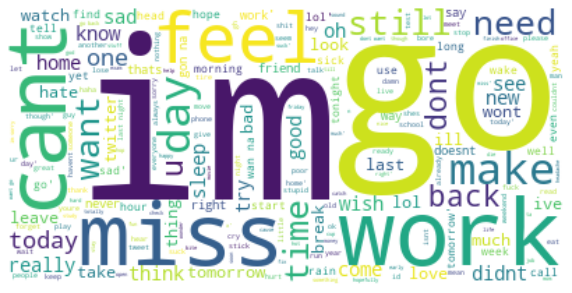

Word: get, count: 258
Word: im, count: 208
Word: go, count: 207
Word: work, count: 98
Word: dont, count: 96
Word: like, count: 95
Word: want, count: 95
Word: feel, count: 91
Word: cant, count: 85
Word: miss, count: 83


In [609]:
class0 = str(data[data.LABEL==0].msg_lemmatized.tolist())
wordcloud = WordCloud(background_color="white").generate(class0)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

filtered = [word for word in class0.split()]
counted = collections.Counter(filtered)

word_count= {}

for letter, count in counted.most_common(10):
    word_count[letter] = count
    
for i,j in word_count.items():
        print('Word: {0}, count: {1}'.format(i,j))

#### Class 1

In [610]:
# Creates a sorted dictionary (sorted by key)
#display(WordCloud().process_text(text))

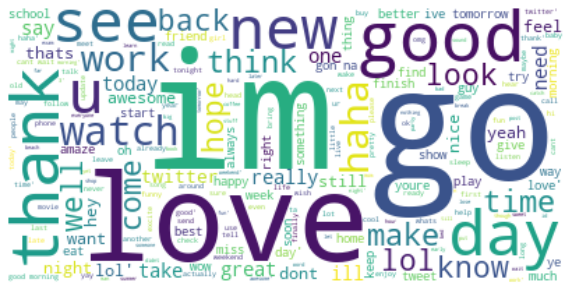

Word: get, count: 189
Word: im, count: 183
Word: go, count: 173
Word: good, count: 147
Word: thank, count: 126
Word: love, count: 122
Word: like, count: 91
Word: day, count: 89
Word: see, count: 87
Word: new, count: 73


In [611]:
class1 = str(data[data.LABEL==1].msg_lemmatized.tolist())
wordcloud_spam = WordCloud(background_color="white").generate(class1)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()


filtered = [word for word in class1.split()]
counted = collections.Counter(filtered)

word_count = {}

for letter, count in counted.most_common(10):
    word_count[letter] = count
    
for i,j in word_count.items():
        print('Word: {0}, count: {1}'.format(i,j))

In [458]:
'''from collections import Counter
dictionary=Counter(class0)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()'''

'from collections import Counter\ndictionary=Counter(class0)\nimport matplotlib.pyplot as plt\nfrom wordcloud import WordCloud\n\ncloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)\nplt.figure(figsize=(16,12))\nplt.imshow(cloud, interpolation=\'bilinear\')\nplt.axis(\'off\')\nplt.show()'

 ## Q4

#### pre-processed data

In [685]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data['scores'] = data['msg_lemmatized'].apply(lambda review: sid.polarity_scores(review))

data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
labels = {0: 'neg', 1: 'pos'}
data['polarity'] = data['LABEL'].map(labels)
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Test accuracy
actual = data['polarity']
predicted = data['comp_score']
accuracy = accuracy_metric(actual, predicted)
print("The Accuracy for raw text is",accuracy)

The Accuracy for raw text is 66.246792628878


In [696]:
data = data.drop(['spell'],axis=1)

In [697]:
df_neg = data[data['LABEL'] == 0]
df_pos = data[data['LABEL'] == 1]

In [698]:
df_neg.head(3)

,LABEL,DATE_TIME,TEXT,scores,compound,comp_score,polarity
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,neg
9,0,Wed Jun 17 09:18:19 2009,Needs to shake this gloomy feeling!! Maybe ...,"{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'comp...",-0.3182,neg,neg
10,0,Mon Jun 22 13:51:56 2009,Minecart ride now. Sarah's still too afraid to...,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",0.5106,pos,neg


In [699]:
df_pos.head(3)

,LABEL,DATE_TIME,TEXT,scores,compound,comp_score,polarity
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.3612,pos,pos
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,pos
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,pos


#### Raw data

In [659]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
data = pd.read_csv('D:/Desktop 10/A1_dataset.csv')

sid = SentimentIntensityAnalyzer()
data['scores'] = data['TEXT'].apply(lambda review: sid.polarity_scores(review))

data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
labels = {0: 'neg', 1: 'pos'}
data['polarity'] = data['LABEL'].map(labels)
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Test accuracy
actual = data['polarity']
predicted = data['comp_score']
accuracy = accuracy_metric(actual, predicted)
print("The Accuracy for raw text is",accuracy)

The Accuracy for raw text is 68.34616281782132


In [660]:
data

,LABEL,DATE_TIME,TEXT,scores,compound,comp_score,polarity
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'comp...",-0.4404,neg,neg
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp...",0.5229,pos,pos
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,"{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'comp...",-0.4404,neg,pos
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,pos
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.6369,pos,pos
...,...,...,...,...,...,...,...
4282,1,Sat Jun 06 22:45:26 2009,@QandQ My performances on my CLEP tests. #qshock,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,pos
4283,0,Tue Jun 16 10:17:07 2009,"ugh no, rcn had all the true blood episodes on...","{'neg': 0.305, 'neu': 0.563, 'pos': 0.131, 'co...",-0.4019,neg,neg
4284,1,Fri May 01 22:00:42 2009,Just returned from the forest! Sarah (my merch...,"{'neg': 0.175, 'neu': 0.825, 'pos': 0.0, 'comp...",-0.4898,neg,pos
4285,1,Sun Jun 07 02:09:46 2009,is proud of her dad and his piece of work. ( h...,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.4767,pos,pos


In [661]:
df_negative = data[data['LABEL'] == 0]
df_positive = data[data['LABEL'] == 1]

In [662]:
df_negative.head(3)

,LABEL,DATE_TIME,TEXT,scores,compound,comp_score,polarity
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,"{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'comp...",-0.4404,neg,neg
9,0,Wed Jun 17 09:18:19 2009,Needs to shake this gloomy feeling!! Maybe ...,"{'neg': 0.35, 'neu': 0.535, 'pos': 0.115, 'com...",-0.4721,neg,neg
10,0,Mon Jun 22 13:51:56 2009,Minecart ride now. Sarah's still too afraid to...,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.5106,pos,neg


In [663]:
df_positive.head(3)

,LABEL,DATE_TIME,TEXT,scores,compound,comp_score,polarity
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp...",0.5229,pos,pos
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,"{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'comp...",-0.4404,neg,pos
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,pos


#### Function that pre processes a sentence.

In [192]:
def text_lower(text):
    text = text.lower()
    return text

def remove_HTMLTags(text):
    rules = [
        {r'>\s+': '>'},                                # Remove spaces after a tag opens or closes.
        {r'\s+': ' '},                                 # Replace consecutive spaces.
        {r'\s*<br\s*/?>\s*': '\n'},                    # Newline after a <br>.
        {r'</(div)\s*>\s*': '\n'},                     # Newline after </p> and </div> and <h1/>.
        {r'</(p|h\d)\s*>\s*': '\n\n'},                 # Newline after </p> and </div> and <h1/>.
        {r'<head>.*<\s*(/head|body)[^>]*>': ''},       # Remove <head> to </head>.
        {r'<a\s+href="([^"]+)"[^>]*>.*</a>': r'\1'},   # Show links instead of texts.
        {r'[ \t]*<[^<]*?/?>': ''},                     # Remove remaining tags.
        {r'^\s+': ''}                                  # Remove spaces at the beginning.
    ]
    for rule in rules:
        for (k, v) in rule.items():
            try:
                regex = re.compile(k)
                text = str(regex.sub(v, text))
            except:
                pass
    htmlspecial = {
        '&nbsp;': ' ', '&amp;': '&', '&quot;': '"',
        '&lt;': ' ', '&gt;': ' '
    }
    for (k, v) in htmlspecial.items():
        text = text.replace(k, v)
    return text 


def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree    


def remove_whitespaces(text):
    text1 = re.sub(' +', ' ',text) 
    return re.sub(r"^\s+|\s+$", "", text1) 


def remove_stopwords(text):
    stopword = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s?')
    return stopword.sub(r'',str(text))

def spell_check(text):
    from autocorrect import Speller
    spell1 = Speller()
    return spell1(text)

def lemmatization(text):
    tokens = []
    lemmatizer=WordNetLemmatizer()
    input_str=word_tokenize(text)
    print(input_str)
    for word in input_str:
        tokens.append(lemmatizer.lemmatize(word,pos='v'))
    return " ".join(tokens)

In [199]:
text = 'scareddd??? www.google.com  hi Im tokn  '
new_data=text_lower(text)
new_data=cleaning_html_tags(new_data)
new_data=remove_urls(new_data)
new_data=remove_Punctuation(new_data)
new_data=remove_whitespaces(new_data)
new_data=remove_stopwords(new_data)
new_data=spell_check(new_data)
new_data=lemmatization(str(new_data))

['scared', 'hi', 'im', 'town']
